In [48]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix,  roc_auc_score, cohen_kappa_score, roc_curve, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from scipy import stats
from sklearn.feature_selection import SelectFromModel
scaler = StandardScaler()
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC

In [49]:
#importing dataset
df = pd.read_csv("weatherAUS.csv")

In [50]:
#checking dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [51]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [53]:
#replace no and yes with 0 and 1
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

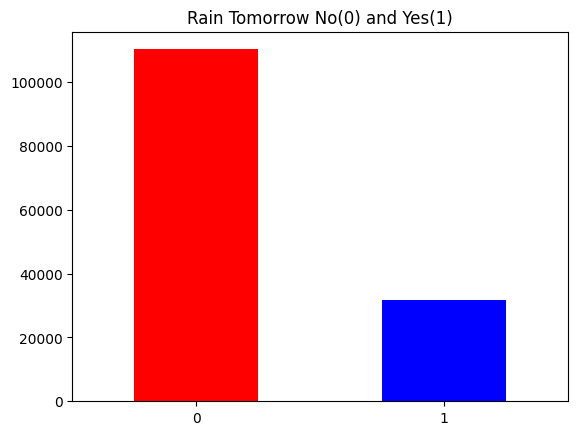

In [54]:
#looking at how much data that we have for rain tomorrow
df['RainTomorrow'].value_counts().plot.bar(color= ['red','blue'], rot=0)
plt.title('Rain Tomorrow No(0) and Yes(1)')
plt.show()

Rain Tomorrow appears to be imbalanced so we're going to sample each equally.

In [55]:
#oversampling smaller group
df_no = df[df.RainTomorrow == 0]
df_yes = df[df.RainTomorrow == 1]
sample = resample(df_yes, replace=True, n_samples=len(df_no), random_state=123)
sampled_df = pd.concat([df_no, sample])

In [56]:
#verified that it's now equal in number of values in each field.
sampled_df['RainTomorrow'].value_counts()

0    110316
1    110316
Name: RainTomorrow, dtype: int64

In [57]:
#looking at percentages for missing data
total = sampled_df.isnull().sum().sort_values(ascending=False)
percent = (sampled_df.isnull().sum()/sampled_df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing)

                Total   Percent
Sunshine       104831  0.475140
Evaporation     95411  0.432444
Cloud3pm        85614  0.388040
Cloud9am        81339  0.368664
Pressure3pm     21746  0.098562
Pressure9am     21728  0.098481
WindGustDir     15491  0.070212
WindGustSpeed   15354  0.069591
WindDir9am      14728  0.066754
WindDir3pm       6440  0.029189
Humidity3pm      6031  0.027335
Temp3pm          4558  0.020659
WindSpeed3pm     4353  0.019730
Humidity9am      3171  0.014372
RainToday        3124  0.014159
Rainfall         3124  0.014159
WindSpeed9am     2206  0.009999
Temp9am          1653  0.007492
MinTemp          1082  0.004904
MaxTemp           471  0.002135
RISK_MM             0  0.000000
Date                0  0.000000
Location            0  0.000000
RainTomorrow        0  0.000000


There are about 40% of missing values from multiple integar values. This is too big of a number to replace or delete. 

In [58]:
#looking at which columns are objects
sampled_df.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

Out of all of these objects, Date and Location don't have any null values. So, will only need to fix the null values in the rest.  

In [59]:
#replaing all null values that are objects with the mode. 
for column in sampled_df[['WindGustDir', 'WindDir9am', 'WindDir3pm']]:
    mode = sampled_df[column].mode()
    sampled_df[column] = sampled_df[column].fillna(mode)

In [60]:
#verifying that the nans of the three objects that we filled in were fixed. 
sampled_df.isna().sum()

Date                  0
Location              0
MinTemp            1082
MaxTemp             471
Rainfall           3124
Evaporation       95411
Sunshine         104831
WindGustDir       15491
WindGustSpeed     15354
WindDir9am        14728
WindDir3pm         6440
WindSpeed9am       2206
WindSpeed3pm       4353
Humidity9am        3171
Humidity3pm        6031
Pressure9am       21728
Pressure3pm       21746
Cloud9am          81339
Cloud3pm          85614
Temp9am            1653
Temp3pm            4558
RainToday          3124
RISK_MM               0
RainTomorrow          0
dtype: int64

In [61]:
#using label enocoding
labels = {}
for col in sampled_df.select_dtypes(include=['object']).columns:
    labels[col] = LabelEncoder()
    sampled_df[col] = labels[col].fit_transform(sampled_df[col])

In [62]:
# impute missing values
imputed_df = sampled_df.copy(deep=True) 
mice_imputer = IterativeImputer()
imputed_df.iloc[:, :] = mice_imputer.fit_transform(sampled_df)

C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\brean\AppData\Local\Temp\ipykernel_20828\4290745656.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  imputed_df.iloc[:, :] = mice_imputer.fit_transform(sampled_df)


In [63]:
imputed_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,396.0,2.0,13.4,22.9,0.6,5.778984,7.313969,13.0,44.0,13.0,...,22.0,1007.7,1007.1,8.000000,4.873302,16.9,21.8,0.0,0.0,0.0
1,397.0,2.0,7.4,25.1,0.0,5.617630,11.450027,14.0,44.0,6.0,...,25.0,1010.6,1007.8,1.745847,2.667158,17.2,24.3,0.0,0.0,0.0
2,398.0,2.0,12.9,25.7,0.0,7.798940,12.242987,15.0,46.0,13.0,...,30.0,1007.6,1008.7,1.827239,2.000000,21.0,23.2,0.0,0.0,0.0
3,399.0,2.0,9.2,28.0,0.0,6.028280,11.609252,4.0,24.0,9.0,...,16.0,1017.6,1012.8,1.295906,2.173363,18.1,26.5,0.0,1.0,0.0
4,400.0,2.0,17.5,32.3,1.0,6.787325,5.801185,13.0,41.0,1.0,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.2,0.0


In [64]:
imputed_df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [65]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

NameError: name 'MiceImputed' is not defined

In [118]:
# Removing outliers from dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(156814, 24)

Text(0.5, 1.0, 'Heatmap Correlation')

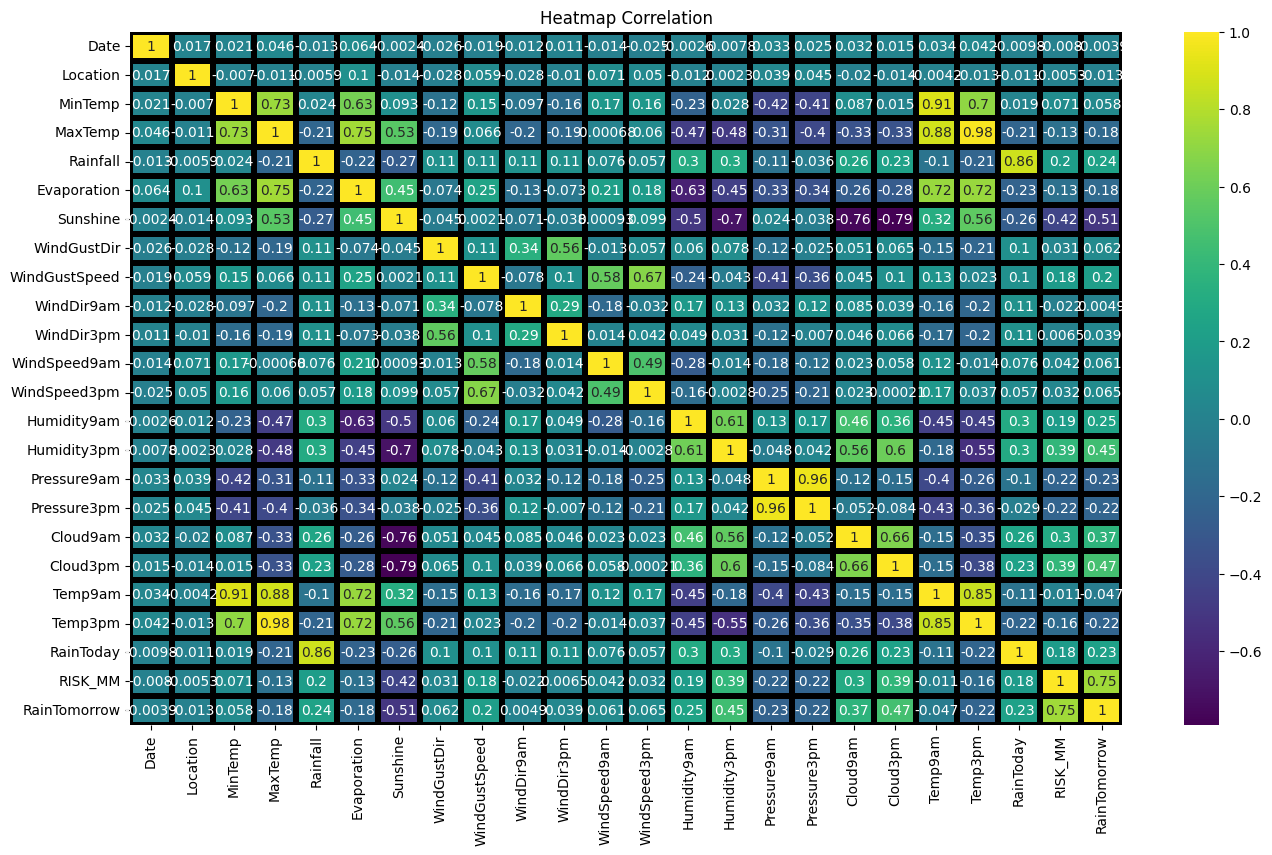

In [119]:
#heatmap
plt.figure(figsize=(16,9))
sns.heatmap(MiceImputed.corr(), annot = True, linewidths=4, linecolor='k', cmap='viridis')
plt.title('Heatmap Correlation')

The biggest correlation with raintoday is rainfall. The biggest correlation between raintomorrow is Sunshine, Risk_mm, cloud3pm, and Humidity3pm. However, will still run feature selection to find the most important features. 

In [122]:
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)
modified_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0.115284,0.041667,0.543417,0.514778,0.435812,0.574183,0.498742,0.8125,0.521127,0.8125,...,0.219048,0.245714,0.298295,0.866788,0.420306,0.506775,0.530612,0.219493,0.000000,0.0
1,0.115575,0.041667,0.375350,0.568966,0.373125,0.564274,0.738977,0.8750,0.521127,0.3750,...,0.249085,0.328571,0.318182,0.336643,0.230034,0.514905,0.594388,0.219493,0.000000,0.0
2,0.115866,0.041667,0.529412,0.583744,0.373125,0.698239,0.785034,0.9375,0.549296,0.8125,...,0.299146,0.242857,0.343750,0.343543,0.172493,0.617886,0.566327,0.219493,0.000000,0.0
3,0.116157,0.041667,0.425770,0.640394,0.373125,0.589494,0.748225,0.2500,0.239437,0.5625,...,0.158975,0.528571,0.460227,0.298503,0.187445,0.539295,0.650510,0.219493,0.076923,0.0
4,0.116448,0.041667,0.658263,0.746305,0.477604,0.636110,0.410875,0.8125,0.478873,0.0625,...,0.329182,0.334286,0.267045,0.782021,0.689974,0.531165,0.732143,0.219493,0.015385,0.0


In [148]:
# Feature Importance using Filter Method (Chi-Square)
x = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(x, y)
x_new = selector.transform(x)
print(x.columns[selector.get_support(indices=True)])

Index(['Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday', 'RISK_MM'],
      dtype='object')


This below graph was created in Tableau. The numbers represent sunshine, while the size of the boxes represent the likelhood of rain (RISK_MM). As we can see, as sunshine decreases, the risk for rain increases. 

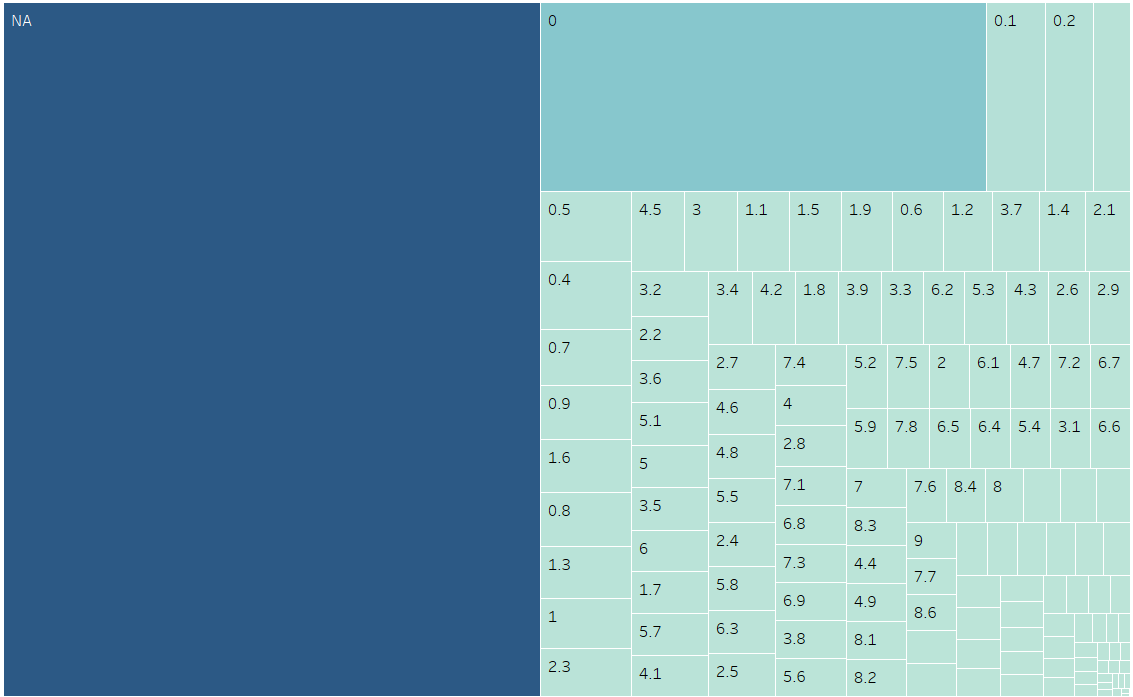

In [150]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12345)

In [151]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [152]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
classifier = KerasClassifier(build_fn = buildclassifier, epochs = 200)
accuracies = cross_val_score(estimator = classifier, X = x_train_r, y = y_train, cv = 6)
mean = accuracies.mean()
variance = accuracies.std()

In [155]:
#classifiying decision tree and fitting it
dtc = DecisionTreeClassifier()
dtc_y = dtc.fit(x_train,y_train)

In [163]:
dtc_pred = dtc_y.predict(x_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,dtc_pred)))
print('Precision Score : ' + str(precision_score(y_test,dtc_pred)))
print('Recall Score : ' + str(recall_score(y_test,dtc_pred)))
print('F1 Score : ' + str(f1_score(y_test,dtc_pred)))

Accuracy Score : 1.0
Precision Score : 1.0
Recall Score : 1.0
F1 Score : 1.0


In [164]:
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,dtc_pred)))

Confusion Matrix : 
[[23807     0]
 [    0 15397]]


In [166]:
#classifying random forest tree and fitting it
rfc= RandomForestClassifier(n_estimators = 100, random_state=42)
rfc_y = rfc.fit(x_train,y_train) 

C:\Users\brean\AppData\Local\Temp\ipykernel_6244\280062215.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_y = rfc.fit(x_train,y_train)


In [167]:
rfc_pred = rfc_y.predict(x_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,rfc_pred)))
print('Precision Score : ' + str(precision_score(y_test,rfc_pred)))
print('Recall Score : ' + str(recall_score(y_test,rfc_pred)))
print('F1 Score : ' + str(f1_score(y_test,rfc_pred)))

Accuracy Score : 1.0
Precision Score : 1.0
Recall Score : 1.0
F1 Score : 1.0


In [168]:
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,rfc_pred)))

Confusion Matrix : 
[[23807     0]
 [    0 15397]]


In [172]:
#SVC classiying and fitting
svc = SVC(random_state=42)
svc_y = svc.fit(x_train,y_train)

C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [173]:
svc_pred = svc_y.predict(x_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,svc_pred)))
print('Precision Score : ' + str(precision_score(y_test,svc_pred)))
print('Recall Score : ' + str(recall_score(y_test,svc_pred)))
print('F1 Score : ' + str(f1_score(y_test,svc_pred)))

Accuracy Score : 0.9954851545760637
Precision Score : 0.9893890675241157
Recall Score : 0.9992206273949471
F1 Score : 0.9942805441561379


In [174]:
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,svc_pred)))

Confusion Matrix : 
[[23642   165]
 [   12 15385]]


In [175]:
#logistic regression classifying and fittnig
lr = LogisticRegression()
lr_y = lr.fit(x_train,y_train)

C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [176]:
lr_pred = lr_y.predict(x_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,lr_pred)))
print('Precision Score : ' + str(precision_score(y_test,lr_pred)))
print('Recall Score : ' + str(recall_score(y_test,lr_pred)))
print('F1 Score : ' + str(f1_score(y_test,lr_pred)))

Accuracy Score : 1.0
Precision Score : 1.0
Recall Score : 1.0
F1 Score : 1.0


In [177]:
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,lr_pred)))

Confusion Matrix : 
[[23807     0]
 [    0 15397]]


In [178]:
#knn classifying and fittnig
knn = KNeighborsClassifier()
knn_y = knn.fit(x_train,y_train)

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
#knn accuracy
kscore = knn.score(x_test,y_test)
print("KNeighbors accuracy", kscore)

In [ ]:
knn_pred = knn_y.predict(x_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,knn_pred)))
print('Precision Score : ' + str(precision_score(y_test,knn_pred)))
print('Recall Score : ' + str(recall_score(y_test,knn_pred)))
print('F1 Score : ' + str(f1_score(y_test,knn_pred)))

In [ ]:
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,lr_pred)))

In [137]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [146]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
        
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 1.0
ROC Area under Curve = 1.0
Cohen's Kappa = 1.0
Time taken = 2.9692740440368652
              precision    recall  f1-score   support

         0.0    1.00000   1.00000   1.00000     23807
         1.0    1.00000   1.00000   1.00000     15397

    accuracy                        1.00000     39204
   macro avg    1.00000   1.00000   1.00000     39204
weighted avg    1.00000   1.00000   1.00000     39204



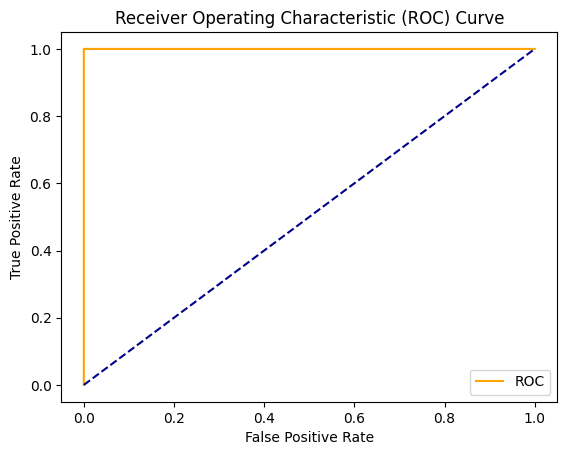

TypeError: confusion_matrix() got an unexpected keyword argument 'cmap'

In [147]:
params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

In [113]:
df1 = df

In [93]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['Day'] = df1['Date'].dt.day

df1.drop('Date',axis = 1, inplace =True)

In [94]:
#verifying changes
df1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,8.0,NaN,16.9,21.8,0.0,0.0,0,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,NaN,NaN,17.2,24.3,0.0,0.0,0,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,NaN,2.0,21.0,23.2,0.0,0.0,0,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,NaN,NaN,18.1,26.5,0.0,1.0,0,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,0.0,0.2,0,2008,12,5


In [95]:
#seperating null values
nan = pd.isnull(df1["RainToday"])
 
# displaying data only with raintoday = NaN
df1[nan]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
14,Albury,9.8,27.7,NaN,NaN,NaN,WNW,50.0,NaN,WNW,...,0.0,NaN,17.3,26.2,NaN,0.0,0,2008,12,16
282,Albury,NaN,18.8,NaN,NaN,NaN,N,31.0,SE,NNE,...,NaN,NaN,8.7,18.1,NaN,0.0,0,2009,9,11
433,Albury,21.7,35.6,NaN,NaN,NaN,SSW,46.0,NaN,S,...,NaN,4.0,25.2,32.9,NaN,0.0,0,2010,2,10
434,Albury,22.5,29.1,NaN,NaN,NaN,SW,24.0,NaN,NNW,...,NaN,7.0,23.4,26.4,NaN,0.0,0,2010,2,12
439,Albury,NaN,31.2,NaN,NaN,NaN,ESE,31.0,SSE,SSW,...,NaN,NaN,21.0,30.0,NaN,0.0,0,2010,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141678,Uluru,22.4,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,25.1,35.7,NaN,1.8,1,2016,1,21
141689,Uluru,20.6,32.6,NaN,NaN,NaN,S,39.0,SE,NE,...,NaN,NaN,22.6,30.0,NaN,0.0,0,2016,2,3
141693,Uluru,23.8,38.3,NaN,NaN,NaN,NaN,NaN,ESE,ESE,...,NaN,NaN,30.6,36.1,NaN,0.0,0,2016,2,8
141828,Uluru,3.2,17.9,NaN,NaN,NaN,E,44.0,SE,E,...,NaN,NaN,8.8,17.2,NaN,0.6,0,2016,6,24


In [96]:
#remove all nan values from rain today
df2 = df1.dropna(subset=['RainToday'])

In [97]:
#remove all nan values from rain tomorrow
df2 = df2.dropna(subset = ['RainTomorrow'])

In [98]:
#confirming nans removed from rain today and rain tomorrow
df2.isna().sum()

Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RISK_MM              0
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

In [111]:
df3 = df2.drop(['Year', 'Month', 'Day', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)

Text(0.5, 1.0, 'Heatmap Correlation')

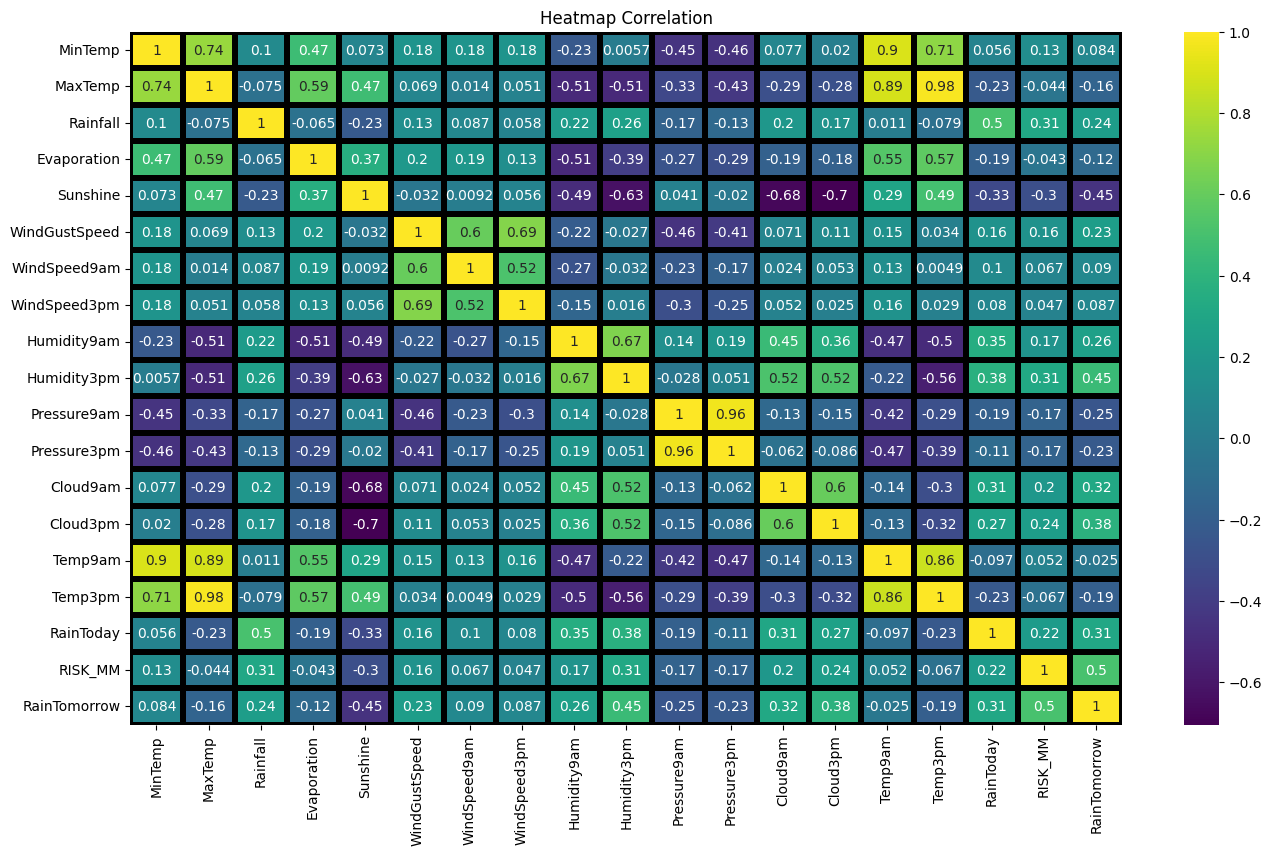

In [112]:
#heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df3.corr(), annot = True, linewidths=4, linecolor='k', cmap='viridis')
plt.title('Heatmap Correlation')

rain today's biggest correlation is with rainfall. While rain tomorrow's biggest correlations are humidity3pm, sunshine, and risk. 

In [ ]:
sns.pairplot(data = df3, vars = ('RainToday', 'RainTomorrow', 'Rainfall', 'Sunshine', 'Humidity3pm', 'RISK_MM'))

In [ ]:
sns.pairplot(data = df3, vars = ('RainToday', 'Rainfall', 'Sunshine', 'Humidity3pm', 'RISK_MM'), hue = 'RainTomorrow')

In [100]:
#setup x,y for split
x = df2.drop('RainTomorrow', axis=1)
y = df2['RainTomorrow']

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [102]:
categorical_columns = x_train.select_dtypes(include=['object']).columns.tolist()
numeric_columns = x_train.select_dtypes(include=['int64', 'float64','int32']).columns.tolist()

In [103]:
numeric_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer()),  # Impute missing values using IterativeImputer
    ('scaler', StandardScaler())       # Standardize numeric features
])

In [104]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('encoder', OneHotEncoder(drop='first', sparse=False))  # One-hot encode categorical features
])

In [105]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_columns),
        ('categorical', categorical_transformer, categorical_columns)
    ],
    remainder='drop'
)

In [106]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [107]:
pipeline.fit(x_train, y_train)

C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp9am', 'Temp3pm',
                                                   'RainToday', 'RISK_MM',
                                                   'Year', 'Month', 'Day']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [108]:
y_pred = pipeline.predict(x_test)

In [109]:
accuracy = accuracy_score(y_test, y_pred)

In [110]:
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21897
           1       1.00      1.00      1.00      6261

    accuracy                           1.00     28158
   macro avg       1.00      1.00      1.00     28158
weighted avg       1.00      1.00      1.00     28158

Confusion Matrix:
 [[21897     0]
 [    1  6260]]
